In [111]:
import anndata as ad
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
import seaborn as sns
import pandas as pd
import os

import pandas as pd
import os
from glob import glob
import numpy as np
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

import gseapy
from gseapy import dotplot, barplot
import matplotlib.colors
from matplotlib import lines
from pydeseq2.dds import DeseqDataSet
# from pydeseq2.DeseqDataSet import DeseqDataSet
# from bioinfokit import analys, visuz
from pydeseq2.ds import DeseqStats
# from pydeseq2.DeseqStats import DeseqStats
from statsmodels.stats.multitest import multipletests 
import numpy as np
import scanpy as sc
from scipy.stats import linregress
path = "/home/eloiseb/stanford_drive/data/RNAseq/RNA/Bulk_rna/Combined/"
pathdata="/home/eloiseb/data/rna/bulk/"
pathdata="/home/eloiseb/stanford_drive/data/rna/"
PALETTE = {"AST": "#8aafa9", 
           'EXC-L23':"#ead1dc",
           'EXC-L4':"#c27ba0",
           'EXC-L5':"#741b47",
            'EXC-L6':"#d9d2e9",
           "EXC-IT":"#c27ba0",
           "EXC-L6-spe":"#d9d2e9",
           "EXC-L6_spe":"#d9d2e9",
                "EXC-L6":"#d9d2e9",
           
           'EXC':"#d9d2e9",
           "INH-CGE":"#f34c0d",
           "INH":"#f34c0d",
           "INH-MGE":"#FCDBCE",
            "MIC":"#165f54",
           # "ENDO-Mural":"#ab910b",
           "Endo":"#ab910b",
           "VLMC":"#fbf0ba",
           "Endo-Mural":"#ab910b",
           "OLD":"#ffc281",
           "OPC":"#7f6140"
          }

palette_exp= {
               "resilience": "#7CAFC4", #"#2b303a",
               "resistance":"#576169", #"#92dce5",
    "AD":#"#BFAE48"
    "#88352b",
        }
import scanpy as sc

In [71]:
metadata = pd.read_csv("/remote/home/eloiseb/data/rna/bulk_harmoni_rosmap_mayo_msbb_metadata.csv")
metadata[~metadata.thal.isna()]

,Unnamed: 0,specimenID,individualID,tissue,BrodmannArea,assay,isPostMortem,RIN,msex,educ,...,RIN2,apoe4_allele,sex,Study,thal,tissue_y,ethnicity,CDR,plaqueMean,ethnicity_y
3026,0,mayo_cbe_1000_CER,1000,cerebellum,NaN,rnaSeq,NaN,8.4,NaN,NaN,...,70.56,1.0,female,MAYO,5.0,CBE,NaN,NaN,NaN,NaN
3027,1,mayo_cbe_1010_CER,1010,cerebellum,NaN,rnaSeq,NaN,8.6,NaN,NaN,...,73.96,0.0,male,MAYO,5.0,CBE,NaN,NaN,NaN,NaN
3028,2,mayo_cbe_1015_CER,1015,cerebellum,NaN,rnaSeq,NaN,9.0,NaN,NaN,...,81.00,1.0,male,MAYO,5.0,CBE,NaN,NaN,NaN,NaN
3029,3,mayo_cbe_1019_CER,1019,cerebellum,NaN,rnaSeq,NaN,8.3,NaN,NaN,...,68.89,1.0,female,MAYO,5.0,CBE,NaN,NaN,NaN,NaN
3030,4,mayo_cbe_1027_CER,1027,cerebellum,NaN,rnaSeq,NaN,9.1,NaN,NaN,...,82.81,0.0,male,MAYO,5.0,CBE,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,499,mayo_tcx_952_TCX,952,temporal cortex,NaN,rnaSeq,NaN,8.3,NaN,NaN,...,68.89,1.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN
3526,500,mayo_tcx_962_TCX,962,temporal cortex,NaN,rnaSeq,NaN,8.4,NaN,NaN,...,70.56,1.0,male,MAYO,5.0,TCX,NaN,NaN,NaN,NaN
3527,501,mayo_tcx_966_TCX,966,temporal cortex,NaN,rnaSeq,NaN,8.2,NaN,NaN,...,67.24,2.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN
3528,502,mayo_tcx_976_TCX,976,temporal cortex,NaN,rnaSeq,NaN,7.9,NaN,NaN,...,62.41,1.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN


In [72]:

age = 80
regions = ['dorsolateral prefrontal cortex', 'temporal cortex'] 
tmp= metadata[#((metadata.Study=='ROSMAP')
                (metadata['tissue'].isin(regions))]

indexes1 = tmp[(((tmp['age_death'] == "90+")) 
                & (tmp['diagnosis']=="CT")
                & ((tmp["CERAD"]>2) |(tmp["CERAD"].isna()))
                &(tmp['Braak']<3) )].individualID.unique().tolist()
tmp= metadata[(metadata.Study=='ROSMAP') & (metadata['age_death'] != "90+")
                &(metadata['tissue'] =='dorsolateral prefrontal cortex') ]
indexes2 = tmp[(((tmp['age_death'].astype(float)>=age)) 
                & (tmp['diagnosis']=="CT")
                & ((tmp["CERAD"]>2) |(tmp["CERAD"].isna()))
                &(tmp['Braak']<3) )].individualID.unique().tolist()



resistance = metadata[((metadata.individualID.isin(indexes1+indexes2))
                       # &(metadata.Study=='ROSMAP')
                       
                       &(metadata['tissue'].isin(regions))
                        & (metadata["assay"] == "rnaSeq"))]
resistance.groupby(["apoe4_allele","Braak"]).individualID.nunique()

tmp= metadata[#(metadata.Study=='ROSMAP')
            (metadata['tissue'].isin(regions)) ]
indexes1 = tmp[(((tmp['age_death'] == "90+")) 
                &(tmp['Braak']>4)
                & ((tmp["CERAD"]<3)|(tmp["CERAD"].isna()) )
                & (tmp['diagnosis']=="AD") )].individualID.unique().tolist()
tmp= metadata[(#(metadata.Study=='ROSMAP') 
            #&
                (metadata['age_death'] != "90+")
                &(metadata['tissue'].isin(regions))) ]

indexes2 = tmp[(((tmp['age_death'].astype(float)>=age)) & (tmp['diagnosis']=="AD") )].individualID.unique().tolist()
ad_match = metadata[((metadata.individualID.isin(indexes1+indexes2)
                    #&(metadata.Study=='ROSMAP')
                      &(tmp['Braak']>4)
                      & ((tmp["CERAD"]<3) |(tmp["CERAD"].isna()) )
                    &(metadata['tissue'].isin(regions))
                    & (metadata["assay"] == "rnaSeq")))]
ad_match.groupby(["apoe4_allele","Braak"]).individualID.nunique()


tmp= metadata[(metadata['tissue'].isin(regions)) ]
indexes1 = tmp[((tmp['age_death'] == "90+") 
                & (tmp['diagnosis']!="AD") &(tmp['Braak']>4) 
                & ((tmp["CERAD"]<3)|(tmp["CERAD"].isna()) )
                &(tmp["cogdx"] == 1 ))].individualID.unique().tolist()
tmp= metadata[( 
    #(metadata.Study=='ROSMAP')
            (metadata['tissue'].isin(regions))
            & (metadata['age_death'] != "90+")) ]
indexes2 = tmp[((tmp['age_death'].astype(float)>=age) 
                & (tmp['diagnosis']!="AD") &(tmp['Braak']>4) 
                & ((tmp["CERAD"]<3) |(tmp["CERAD"].isna()) )
                &(tmp["cogdx"] == 1 ))].individualID.unique().tolist()
resilience = metadata[((metadata.individualID.isin(indexes1+indexes2))
                    # &(metadata.Study=='ROSMAP')
                        &(metadata['tissue'].isin(regions))
                    & (metadata["assay"] == "rnaSeq"))]
resilience.groupby(["apoe4_allele","Braak"]).individualID.nunique()

apoe4_allele  Braak
0.0           5.0      19
1.0           5.0       4
Name: individualID, dtype: int64

In [73]:
resistance["Group"]= "resistance"
resilience["Group"] = "resilience"
ad_match["Group"] ="AD"
concat = pd.concat([resistance, resilience, ad_match])
print(concat.shape)
print(concat.individualID.nunique())

(197, 35)
196


In [74]:
concat.groupby(["Group", "CERAD"]).size()

Group       CERAD
AD          1.0      61
            2.0      18
resilience  1.0      15
            2.0       9
resistance  3.0      11
            4.0      36
dtype: int64

In [142]:
concat.groupby(["Group", "sex"]).size()

Group       sex   
AD          female    58
            male      33
resilience  female     4
            male       5
resistance  female    18
            male      17
dtype: int64

In [76]:

model = "/remote/home/eloiseb/experiments/deconv_rna/universal_kfold_totnorm_log_nosparse/"
met = model + "metrics_all_genes.csv"

df_metrics = pd.read_csv(met)

df_metrics["res"] = df_metrics["res"].astype(float)

df_metrics.groupby(["celltype", "metrics"]).res.mean()

mat = df_metrics[df_metrics.metrics == "spearman"].pivot(index=["celltype", "fold"], columns=["genes"], values="res").fillna(0).reset_index().groupby("celltype")[df_metrics.genes.unique().tolist()].mean()
mat[mat<=0.3] = 0
mask = mat.values
mask[mask>0] = 1
np.count_nonzero(mat,axis=1)

array([14680, 14601, 14694, 14662, 14671, 14654, 14650])

In [77]:
model = "/remote/home/eloiseb/experiments/deconv_rna/universal_all/"
celltypes = ["AST","EXC","Endo-Mural","INH", "MIC","OLD", "OPC"]
fold=0
model_f = model + "/exp_kfold_%s/"%str(fold)
deconv_ = model_f + "test/bulk_sample_decon_combined_ros_map_mayo_bulk_count/bulk_sample_decon/predictions_pseudobulk_Test_no_filt.npz"
ll = np.load(deconv_)["mat"]
ll.shape
deconv_ = model_f + "test/bulk_sample_decon_combined_ros_map_mayo_bulk_count/bulk_sample_decon/labels_Test.npz"
ff = np.load(deconv_)["mat"]
ll[ll<0] = 0
ll.shape
ll = ll*mask[np.newaxis, :, :]

tt = [it for it in ff.tolist() if "rosemap" in it]
tt[:2]

index = [i for i,it in enumerate(ff.tolist()) if it in concat.specimenID.unique().tolist()]
indi = [it for i,it in enumerate(ff.tolist()) if it in concat.specimenID.unique().tolist()]



ll = ll[index,:,:]
ff = ff[index]

concat = concat[concat.specimenID.isin(indi)]
concat



,Unnamed: 0,specimenID,individualID,tissue,BrodmannArea,assay,isPostMortem,RIN,msex,educ,...,apoe4_allele,sex,Study,thal,tissue_y,ethnicity,CDR,plaqueMean,ethnicity_y,Group
12,12,rosemap_07_120410,R7721691,dorsolateral prefrontal cortex,NaN,rnaSeq,NaN,5.6,1.0,19.0,...,0.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
60,60,rosemap_128_120419,R4575675,dorsolateral prefrontal cortex,NaN,rnaSeq,NaN,8.5,1.0,20.0,...,0.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
138,138,rosemap_182_120424,R9818080,dorsolateral prefrontal cortex,NaN,rnaSeq,NaN,8.4,1.0,22.0,...,0.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
272,272,rosemap_270_120430,R3485645,dorsolateral prefrontal cortex,NaN,rnaSeq,NaN,7.0,0.0,16.0,...,0.0,female,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
346,346,rosemap_314_120501,R5221394,dorsolateral prefrontal cortex,NaN,rnaSeq,NaN,6.9,1.0,18.0,...,0.0,male,ROSMAP,NaN,NaN,NaN,NaN,NaN,NaN,resistance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,495,mayo_tcx_896_TCX,896,temporal cortex,NaN,rnaSeq,NaN,9.0,NaN,NaN,...,1.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN,AD
3522,496,mayo_tcx_933_TCX,933,temporal cortex,NaN,rnaSeq,NaN,8.8,NaN,NaN,...,1.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN,AD
3524,498,mayo_tcx_948_TCX,948,temporal cortex,NaN,rnaSeq,NaN,8.4,NaN,NaN,...,0.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN,AD
3525,499,mayo_tcx_952_TCX,952,temporal cortex,NaN,rnaSeq,NaN,8.3,NaN,NaN,...,1.0,female,MAYO,5.0,TCX,NaN,NaN,NaN,NaN,AD


In [78]:
concat.groupby(["Study", "Group", "sex"]).individualID.nunique()

Study   Group       sex   
MAYO    AD          female    24
                    male      15
        resistance  female     3
                    male       5
ROSMAP  AD          female    34
                    male      18
        resilience  female     4
                    male       5
        resistance  female    15
                    male      12
Name: individualID, dtype: int64

  Group     sex  individualID
0    AD  female            58
1    AD    male            33


Text(0, 0.5, 'Number of individuals')

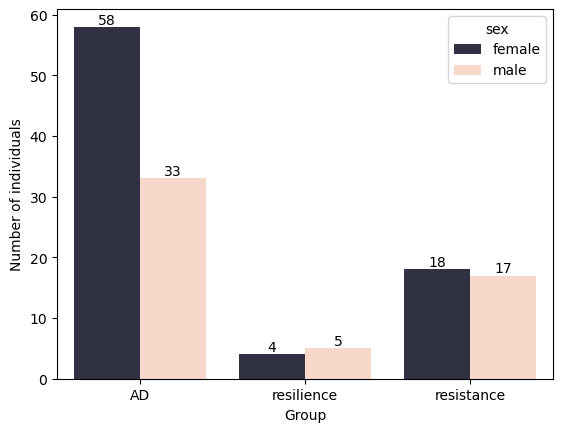

In [8]:
to_plot = concat.groupby(["Group", "sex"]).individualID.nunique().reset_index()
print(to_plot.head(2))
palette = {"female":"#2D3047", "male":"#ffd5c2"}
ax = sns.barplot(data = to_plot, x="Group", hue="sex", y="individualID", palette=palette)
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel("Number of individuals")

  Group  apoe4_allele  individualID
0    AD           0.0            42
1    AD           1.0            48


Text(0, 0.5, 'Number of individuals')

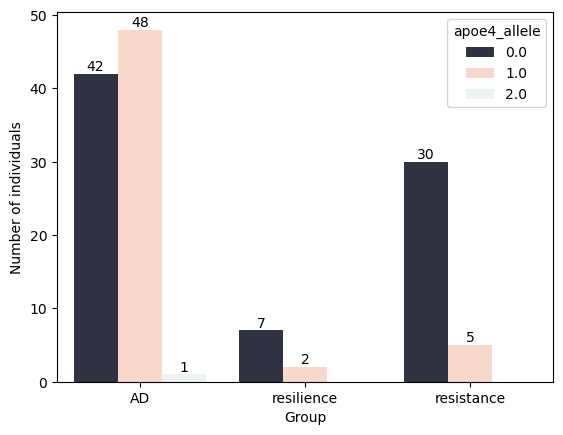

In [9]:
to_plot = concat.groupby(["Group", "apoe4_allele"]).individualID.nunique().reset_index()
print(to_plot.head(2))
palette = {0:"#2D3047", 1:"#ffd5c2", 2:"#eef2f3"}
ax = sns.barplot(data = to_plot, x="Group", hue="apoe4_allele", y="individualID", palette=palette)
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel("Number of individuals")

  Group  Braak  individualID
0    AD    4.5             5
1    AD    5.0            58


Text(0, 0.5, 'Number of individuals')

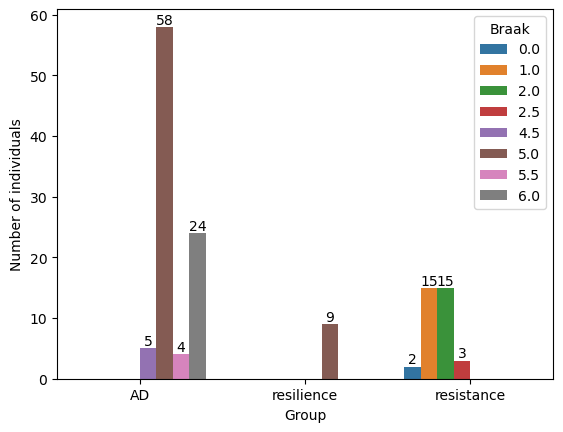

In [10]:
to_plot = concat.groupby(["Group", "Braak"]).individualID.nunique().reset_index()
print(to_plot.head(2))
palette = {0:"#2D3047", 1:"#ffd5c2", 2:"#eef2f3"}
ax = sns.barplot(data = to_plot, x="Group", hue="Braak", y="individualID")#, palette=palette)
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel("Number of individuals")

  Group  CERAD  individualID
0    AD    1.0            40
1    AD    2.0            12


Text(0, 0.5, 'Number of individuals')

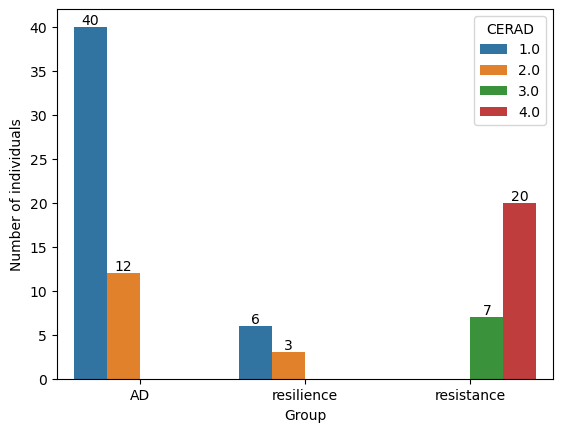

In [79]:
var="CERAD"
to_plot = concat.groupby(["Group", var]).individualID.nunique().reset_index()
print(to_plot.head(2))
palette = {0:"#2D3047", 1:"#ffd5c2", 2:"#eef2f3"}
ax = sns.barplot(data = to_plot, x="Group", hue=var, y="individualID")#, palette=palette)
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel("Number of individuals")

In [80]:
genes = pd.read_csv("/remote/home/eloiseb/data/rna/combined_ros_map_mayo_bulk_count.csv")
genes =genes.drop("Sample_num", axis=1).columns.tolist()

In [81]:
df_tissue = pd.DataFrame(columns=["Sample_num", "celltypes"]+ genes)
for i,it in enumerate(ff):
    for j,ct in enumerate(celltypes):
        df_tissue.loc[len(df_tissue), :] = [it, ct] + ll[i,j, :].tolist()
df_tissue

df_tissue.to_pickle("all_group_interest_rosmap_mayo.pickle")

In [82]:
df_tissue = df_tissue.merge(concat, left_on="Sample_num", right_on="specimenID")

In [83]:
df_tissue.rename(columns={"RIN2_x":"RIN2" }, inplace=True)

In [84]:
df_tissue_lbd = pd.read_pickle("LBB_ACC_group.pickle")
df_tissue_lbd["Study"] = "LBD_ACC"
df_tissue_lbd.Group = df_tissue_lbd.Group.replace({'AD-LBD-':"AD"}).values

In [85]:
df_tissue = pd.concat([df_tissue_lbd, df_tissue])
df_tissue

,Sample_num,celltypes,PON1,NUGGC,PRADC1,EVI5L,CEP95,ORC1,DMKN,NCK1,...,dcfdx_lv,diagnosis,RIN2_y,apoe4_allele,thal,tissue_y,ethnicity,CDR,plaqueMean,ethnicity_y
0,NA04-216,AST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NA04-216,EXC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NA04-216,Endo-Mural,42.885914,48.835575,278.862671,443.393372,176.032959,46.612465,62.016163,117.650726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NA04-216,INH,0.0,0.0,240.852997,381.207001,99.205009,0.0,0.0,49.711128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NA04-216,MIC,0.0,0.0,106.60305,187.122681,52.215588,0.0,0.192597,33.390923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,rosemap_952_131107,Endo-Mural,18.640646,12.968178,25.785488,186.860535,55.485832,20.544697,34.358471,38.041431,...,4.0,AD,60.84,1.0,NaN,NaN,NaN,NaN,NaN,NaN
941,rosemap_952_131107,INH,0.0,0.0,81.400093,604.008057,123.696976,0.0,0.0,37.279541,...,4.0,AD,60.84,1.0,NaN,NaN,NaN,NaN,NaN,NaN
942,rosemap_952_131107,MIC,6.98703,2.825322,12.665039,77.170578,18.833658,3.711326,6.36495,19.27981,...,4.0,AD,60.84,1.0,NaN,NaN,NaN,NaN,NaN,NaN
943,rosemap_952_131107,OLD,1.724604,0.0,17.986052,103.86338,23.021992,5.298292,6.117005,21.834618,...,4.0,AD,60.84,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
df_tissue.groupby("Group").Sample_num.nunique()

Group
AD            116
AD-LBD+         8
resilience      9
resistance     46
Name: Sample_num, dtype: int64

# Multivariate

In [94]:

# from statsmodels.stats.multitest import multipletests 
#from pydeseq2.default_inference import DefaultInference
# #import diffxpy.api as de
# from statannotations.Annotator import Annotator
import seaborn as sns
from sklearn.model_selection import LeaveOneOut, RepeatedKFold, RepeatedStratifiedKFold, StratifiedGroupKFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import mannwhitneyu, spearmanr, pearsonr

# from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from tqdm import tqdm
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score
from joblib import Parallel, delayed
from sklearn.feature_selection import VarianceThreshold 
import warnings
warnings.filterwarnings("ignore")
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

feat_ = [50, 100, 250, 500, 750, 1000, 1250, 1500, 1750, 2000]
import os
models = {
                                'EN': LogisticRegression(penalty='elasticnet', l1_ratio=0.5, fit_intercept=False, solver='saga', max_iter=10000), #'EN': customLogisticRegressionCV(cv=5, l1_ratios=[0, 0.25, 0.5, 0.75, 1], fit_intercept=False),
                                'LASSO': LogisticRegression(penalty='l1', fit_intercept=False, solver='saga', max_iter=10000), #customLogisticRegressionCV(cv=5, l1_ratios=[1], fit_intercept=False), #
                                'Ridge': LogisticRegression(penalty='l2', fit_intercept=False), #customLogisticRegressionCV(cv=5, l1_ratios=[0], fit_intercept=False), #
                                'Random Forest': RandomForestClassifier(n_jobs=-1),
                                'KNN': KNeighborsClassifier(n_jobs=-1),
                                'SVM': SVC(probability=True),  #rbf for AD, linear for LBD
                                'XGBoost': XGBClassifier(n_jobs=-1),
                                # "LGBM":LGBMClassifier(random_state=1)
                            }

variance_thres = 0.0

                   
def train_final(X,y,group,ri, mod,
                n_out_splits,exp,
               ct):
    l_y_pred = []
    l_y_pred_c = []
    l_y_test = []
    pred_dum = []
    pred_dum_c = []
    res = pd.DataFrame( columns=['model','celltype',"Experiment",'AUROC',"AUPRC","pvalue", "F1", "AUROC random", "AUPRC random", "F1 random"])
    i = 0
    rng = np.random.default_rng(ri)
    rints = rng.integers(low=0, high=1000, size=1)
    outer_cv =  StratifiedKFold(n_splits=n_out_splits, shuffle=True,  random_state=rints[0])
    nb_ = len(y)
    df_results = pd.DataFrame(columns=["case","iter"]+np.arange(nb_).tolist())
    for i1, (train_index, test_index) in enumerate(outer_cv.split(X,y,groups=group)):
        
        X_train, X_test = X[train_index, :], X[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
                            # patient_inner = pat[train_index]
        if (len(set(y_train))>1) & (len(set(y_test))>1):
            pipe = Pipeline([#("scale", StandardScaler()),
                             ("filter",VarianceThreshold(threshold=variance_thres)),
                                                   # ("red", PCA(n_components=len(train_index))),
                                                       # ("select", SelectKBest(f_classif,k=nb)),
                                                    ("model", models[mod])
                                                    ])
            pipe.fit(np.array(X_train), np.array(y_train))
    
            y_pred = np.array(pipe.predict_proba(np.array(X_test))[:, 1])
            y_pred_c = np.array(pipe.predict(np.array(X_test)))
            tmp = np.empty((nb_))
            tmp[test_index] = y_pred
            df_results.loc[len(df_results),:] = ["pred",i1] + tmp.tolist()
            tmp = np.empty((nb_))
            tmp[test_index] = y_test
            df_results.loc[len(df_results),:] = ["true",i1] + tmp.tolist()
            l_y_pred.append(y_pred)
            l_y_test.append(y_test)
            l_y_pred_c.append(y_pred_c)
            pipe = Pipeline([#("scale", StandardScaler()),
                             ("filter",VarianceThreshold(threshold=variance_thres)),

                                                    # ("red", PCA(n_components=len(train_index))),
                                                       # ("select", SelectKBest(f_classif,k=nb)),
                                                    ("model", DummyClassifier())
                                                    ])
            pipe.fit(np.array(X_train), np.array(y_train))
            y_pred_dummy = np.array(pipe.predict_proba(np.array(X_test))[:, 1])
            pred_dum.append(y_pred_dummy)  
            y_pred_dummy = np.array(pipe.predict(np.array(X_test)))
            pred_dum_c.append(y_pred_dummy)   
    y_preds = np.hstack(l_y_pred)
    y_preds_c = np.hstack(l_y_pred_c)
    y_tests = np.hstack(l_y_test)
    y_pred_du = np.hstack(pred_dum)
    y_pred_du_c = np.hstack(pred_dum_c)
    auc = roc_auc_score(y_tests, y_preds)#, average="weighted")
    auprc = average_precision_score(y_tests, y_preds)#, average="weighted")#np.mean(l_auroc)
    f1 = f1_score(y_tests, y_preds_c)#, average="weighted")
    pv = mannwhitneyu(y_preds[y_tests==0], y_preds[y_tests==1]).pvalue
    auc_dum = roc_auc_score(y_tests, y_pred_du)#, average="weighted")
    auprc_dum = average_precision_score(y_tests, y_pred_du)#, average="weighted")
    f1_dum = average_precision_score(y_tests, y_pred_du_c)#, average="weighted")

    res.loc[0,:] = [mod, ct,exp,auc, auprc,pv,f1,auc_dum, auprc_dum, f1_dum]
    
    return res, df_results



warnings.filterwarnings("ignore")
model_list = ['LASSO', 'Ridge', 'EN','Random Forest', 'SVM', "XGBoost"]#,"LGBM" ]
# celltypes  = list(adata.obs.celltype.unique())

i = 0
#for nb in [2, 5, 10, 15, 20,25,40, 50,60, 75, 100]:
with_sex= False
with_age = False

n_out_splits = 5
nb_boostrap = 5
nb_boostrap1 = 5


n_out_splits = 5
min_count = 5
min_total_count =15
# outer_cv = StratifiedKFold(n_splits=10,shuffle=True)
outer_cv_results = {key: [] for key in [ "ct", "outer_split","ri", "n_features", "algo", "F1","AUROC", "AUPRC","F1 random","AUROC random", "AUPRC random"]}

res = []
res_inn = []
if True:
    cond0,cond1 = 'AD',"resistance"
    namef = "./multivariate_resist_ad_filtered.pickle"
    # if not os.path.exists(namef):
    # for exp in combine["Experiment"].unique():
            # print(namef)
        # for br in brain_regions:
    exp = cond0 + "|" + cond1
    for ct in celltypes:
               for l_mod in model_list:
                    
                    print(ct)
                    
                   
                    condition_filtering = ((df_tissue["Group"].isin([cond0,cond1]))
                                           &df_tissue.celltypes.isin([ct])
                                          )
                                           # & (combine.Experiment.isin([exp])))
                    dict_cond = {cond0:0,cond1:1}


                    conds = df_tissue["Group"].unique().tolist()
                    dict_cond = {it:0 if it ==cond0 else 1 for it in conds}
                    comb_filtered = df_tissue[condition_filtering]
                    
                    # comb_filtered =  comb_filtered[comb_filtered.X.sum(0)!=0]

                    patients,X,y = (comb_filtered[["Sample_num","Group"]].reset_index(drop=True),
                                    comb_filtered[genes].values, comb_filtered["Group"].map(dict_cond).values)


                    ma = X.copy()
                    ma[ma<=min_count] = 0
                    ma[ma>min_count] = 1
                    list_ = ma.sum(0)>min_count
                    list_2 = X.astype(float).sum(0)>min_total_count
                    # list_e = [it for ii, it in enumerate(list_) if it and list_2[ii]]
                    list_e = [True if it and list_2[ii] else False for ii, it in enumerate(list_) ]
                    X = X[:,list_e]
                    print(X.shape)
                   
                    pat = comb_filtered["Sample_num"].tolist()
                 
                    outal = Parallel(n_jobs=30, verbose=100)(
                                                delayed(train_final)(X,y,pat,ri,l_mod,
                                                                     n_out_splits,exp,
                                           ct) for ri in tqdm(range(nb_boostrap)))
                    # print(out)
                    out = [it[0] for it in outal]
                    pred_df = [it[1] for it in outal]
                    pred_df = pd.concat(pred_df)
                    # pred_df_ctrl = pd.concat([it[2] for it in outal])
                    # pred_df_lrrk2 = pd.concat([it[2] for it in outal])
                    # print(out)
                  
                    pred_df["ct"] = ct
                    # pred_df["Experiment"] = exp
                    rest = pd.concat(out)
                    mean_auc = np.mean(rest["AUROC"].values)
                    std_auc = np.std(rest["AUROC"].values)
                    mean_au = np.mean(rest["AUPRC"].values)
                    mean_f1 = np.mean(rest["F1"].values)
                    mea_du = np.mean(rest["AUROC random"].values)
                    # if mean_auc> mea_du:
                    #     pred_df.to_pickle("%s_%s_%s_with_sex_age.pickle"%(br,ct,comp))
                    #     # pred_df_ctrl["br"] = br
                        # pred_df_ctrl["ct"] = ct
                        # pred_df_lrrk2["br"] = br
                        # pred_df_lrrk2["ct"] = ct
                        # pred_df_ctrl.to_pickle("pred_ctrl_%s_%s_%s_with_sex_age.pickle"%(br,ct,comp))
                        # red_df_lrrk2.to_pickle("pred_lrrk2_%s_%s_%s_with_sex_age.pickle"%(br,ct,comp))
                    print(f"{ct}, {l_mod}: AUC: {mean_auc} +/- {std_auc}, AUPRC: {mean_au}, f1: {mean_f1}, random: {mea_du}") 
                    res.append(rest)
                    i+=1
    pd.concat(res).to_pickle(namef)         
pd.concat(res).to_pickle(namef)


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   11.7s
[Parallel(n_jobs=30)]: Done   2 out of   5 | elapsed:   13.2s remaining:   19.8s
[Parallel(n_jobs=30)]: Done   3 out of   5 | elapsed:   13.3s remaining:    8.8s
[Parallel(n_jobs=30)]: Done   5 out of   5 | elapsed:   13.3s finished
OPC, Random Forest: AUC: 0.7276799100449776 +/- 0.020782623215511678, AUPRC: 0.5171400375370162, f1: 0.41011701001470824, random: 0.48791229385307344
OPC
(162, 2828)


100%|███████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 3902.40it/s]

[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.



/home/eloiseb/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
/home/eloiseb/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
/home/eloiseb/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
/home/eloiseb/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
/home/eloiseb/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=30)]: Done   2 out of   5 | elapsed:    6.5s remaining:    9.7s
[Parallel(n_jobs=30)]: Done   3 out of   5 | elapsed:    6.5s remaining:    4.3s
[Parallel(n_jobs=30)]: Done   5 out of   5 | elapsed:    6.6s finished
OPC, SVM: AUC: 0.5423538230884558 +/- 0.06290300100764153, AUPRC: 0.32380293543128047, f1: 0.0643393357342937, random: 0.48791229385307344
OPC
(162, 2828)


100%|███████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 5302.53it/s]

[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.



/home/eloiseb/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
/home/eloiseb/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
/home/eloiseb/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
/home/eloiseb/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(
/home/eloiseb/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=30)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.2min
[Parallel(n_jobs=30)]: Done   3 out of   5 | elapsed:  2.2min remaining:  1.5min
[Parallel(n_jobs=30)]: Done   5 out of   5 | elapsed:  2.3min finished
OPC, XGBoost: AUC: 0.7502623688155922 +/- 0.013359111666537332, AUPRC: 0.5038844016839332, f1: 0.4031863442389758, random: 0.48791229385307344


In [104]:
# res = pd.concat(res)
final = []
for ct in res.celltype.unique():
    for exp in res.Experiment.unique():
        tmp = res[(res.celltype==ct) &(res.Experiment==exp)]
        tmp2 =tmp.groupby(["model"]).agg({"AUROC":"mean", "AUPRC":"mean"})
        tmp2 = tmp2.sort_values("AUROC", ascending=False)
        best_m = tmp2.index[0]
        tmp3 = tmp[tmp.model ==best_m]
        final.append(tmp3)
final = pd.concat(final)
final.reset_index(inplace=True, drop=True)
final

,model,celltype,Experiment,AUROC,AUPRC,pvalue,F1,AUROC random,AUPRC random,F1 random
0,Random Forest,AST,AD|resistance,0.743066,0.495805,0.000001,0.3125,0.487912,0.27889,0.283951
1,Random Forest,AST,AD|resistance,0.73913,0.547051,0.000002,0.349206,0.487912,0.27889,0.283951
2,Random Forest,AST,AD|resistance,0.759839,0.536397,0.0,0.380952,0.487912,0.27889,0.283951
3,Random Forest,AST,AD|resistance,0.743722,0.533372,0.000001,0.295082,0.487912,0.27889,0.283951
4,Random Forest,AST,AD|resistance,0.731166,0.548526,0.000005,0.393939,0.487912,0.27889,0.283951
5,Random Forest,EXC,AD|resistance,0.708021,0.556017,0.000037,0.438356,0.487912,0.27889,0.283951
6,Random Forest,EXC,AD|resistance,0.702305,0.464128,0.000061,0.426667,0.487912,0.27889,0.283951
7,Random Forest,EXC,AD|resistance,0.727792,0.490523,0.000006,0.4,0.487912,0.27889,0.283951
8,Random Forest,EXC,AD|resistance,0.677849,0.458627,0.000425,0.394366,0.487912,0.27889,0.283951
9,Random Forest,EXC,AD|resistance,0.716173,0.504509,0.000018,0.383562,0.487912,0.27889,0.283951


In [105]:
toplot = pd.melt(final, id_vars =["celltype"], 
                 value_name="Score",
                 value_vars=["AUROC", "AUPRC", "AUROC random", "AUPRC random"])
toplot

,celltype,variable,Score
0,AST,AUROC,0.743066
1,AST,AUROC,0.73913
2,AST,AUROC,0.759839
3,AST,AUROC,0.743722
4,AST,AUROC,0.731166
...,...,...,...
135,OPC,AUPRC random,0.27889
136,OPC,AUPRC random,0.27889
137,OPC,AUPRC random,0.27889
138,OPC,AUPRC random,0.27889


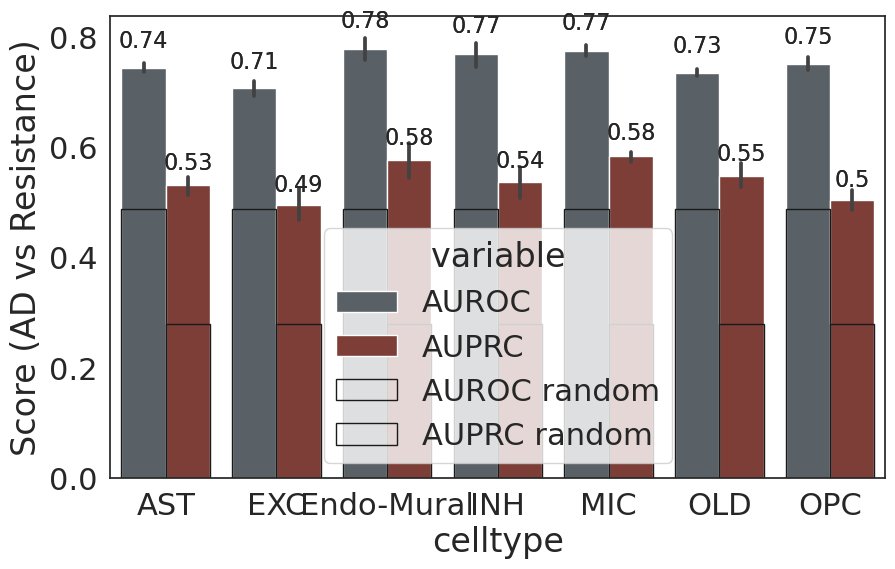

In [106]:

import seaborn as sns
cond = "SPOR$GBA1"
Exp = "Tissue"
tmp = final#[final.Experiment ==Exp]
# sns.set(style="white", font_scale=1.2)
# g = sns.FacetGrid(data=tmp, col="Experiment", col_wrap=1,height=4, aspect=3,)
# g.map_dataframe(sns.barplot, x="celltype", y="AUROC", hue="model", palette="tab20")#, palette=PALETTE)#, style="model")
# # g.map_dataframe(sns.barplot, x="celltype", y="AUROC random", hue="model", fill=False,color="black")#, style="model")


# for ax in g.axes.flatten():
#     ax.axhline(y=0.5, c="k")
#     ax.axhline(y=0.7, c="k", linestyle=":")
# #     #ax.axhline(y=0.8, c="k", linestyle="--")
# #     tit = ax.get_title()
# #     tit = tit.replace("covar =", "").replace("$", "vs")
# #     ax.set_title(tit)
# #     for i, bar in enumerate(ax.patches):
# #         if i >=66:
# #             bar.set_hatch("//")
# #             bar.set_edgecolor("k")
# #     #ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# plt.legend()
# plt.show()
sns.set(style="white", font_scale=2)
final["AUROC"] = final["AUROC"].astype(float)
fig, ax = plt.subplots(figsize=(10,6))
palette_exp['AUROC'] = palette_exp['resistance']
palette_exp['AUPRC'] = palette_exp['AD']
sns.barplot(data=toplot[toplot["variable"].isin(["AUROC","AUPRC"])], x="celltype", 
            y="Score", ax=ax, hue="variable", palette=palette_exp)
for bars in ax.containers:
    # if bars.get_label() == hue_order[0]:
        # group_total = df_f
    # else:
    # group_total = df_t
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{(height):.2}', (x + width/2, y + height*1.05), ha='center', fontsize=16)
sns.barplot(data=toplot[toplot["variable"].isin(["AUROC random","AUPRC random"])], x="celltype", 
            y="Score", ax=ax, hue="variable", fill=False, color="k", edgecolor="k")
# sns.barplot(data=final, x="celltype", y="AUPRC", ax=ax, color=palette_exp['AD'])
ax.set_ylabel("Score (AD vs Resistance)")
# pairs=[((ct, "Deconvoluted Nuclei"), (ct, "Deconvoluted Tissue")) for ct in celltypes]
# pairs+=[((ct, "Deconvoluted Nuclei"), (ct, "snRNA")) for ct in celltypes]
# pairs+=[((ct, "Deconvoluted Tissue"), (ct, "snRNA")) for ct in celltypes]
      

# annotator = Annotator(ax, pairs, data=final, x="celltype", y="AUROC", hue="Experiment")
# annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction="BH")
# annotator.apply_and_annotate()

plt.savefig(os.path.join("figures/model_cv_ad_resit_all_3_datasets.svg"))

# Univariate

In [ ]:

df_dif = []
#ct_t = "CA1"
method = "wilcoxon"
group="Group"
REF="AD"

min_count = 5
min_total_count =15
# for tissue in df_tissue.tissue.unique():

dico_boostrap = {}
# if True:
nb_boostrap =1
for it in range(nb_boostrap):
    for test in ["resistance"]:
        # combined = combine[combine.Group.isin(["VEH","Veh", test])].copy(deep=True)
        combined = df_tissue[(df_tissue[group].isin([REF, test]))
                       ].copy(deep=True)
        # combined = combined.sample(frac=0.8,replace=False, random_state=it)
        count_df = combined.set_index("Sample_num")[genes]
       
        cl = combined.set_index("Sample_num")[[ 
                                               group, "celltypes","Study", "sex"]]
        
        if combined [group].nunique()>1:
            for ii, ct in enumerate(cl.celltypes.unique()):
                        print(ct)
                        #genes =all_genes
                        
                        tmp_g = np.asarray(genes)[np.where(mask[ii,:]==1)[0]].tolist()
                        c_tmp = count_df.loc[(cl.celltypes==ct),:][tmp_g].astype(float)
                        gene_null = np.where(c_tmp.sum(0)!=0)[0]
                        print(gene_null.shape)
                        tmp_g = np.asarray(tmp_g)[gene_null]
                        c_tmp = c_tmp[tmp_g.tolist()]
                        


                        ma = c_tmp.copy()
                        ma[ma<=min_count] = 0
                        ma[ma>min_count] = 1
                        list_ = ma.sum(0)>min_count
                        list_2 = c_tmp.astype(float).sum(0)>min_total_count
                        # list_e = [it for ii, it in enumerate(list_) if it and list_2[ii]]
                        list_e = [True if it and list_2[ii] else False for ii, it in enumerate(list_) ]
                        c_tmp = c_tmp.iloc[:,list_e]
                        print(c_tmp.shape)
                
                        cl_tmp = cl.loc[(cl.celltypes==ct),:]
                        print(cl_tmp[group].unique())
                        print(cl_tmp.groupby([group, "Study"]).size())
                        dds = DeseqDataSet(
                            counts=c_tmp.astype(int),
                            metadata=cl_tmp,
                            design_factors=[group, "sex", "Study"],
                            
                            refit_cooks=True,
                            n_cpus=8,
                            )
                        dds.deseq2()
        
                        stat_res = DeseqStats(dds,contrast=[group, test, REF])
                        stat_res.summary()
                        glist =stat_res.results_df
                        glist["gene"] =glist.index.tolist()
                        pp = "pvalue"#"pvals"
                        lf = "log2FoldChange"#"logfoldchanges"
                       # pp = "padj"
        
                        dat = ad.AnnData(c_tmp)
                        dat.obs = cl_tmp
                        dat.var["gene"] = c_tmp.columns.tolist()
        
                        # sc.tl.rank_genes_groups(dat, groupby=group, method=method, 
                        #                             rankby_abs=True,
                        #                            gene_symbols="gene",
                        #                             #gene_symbols="peakid",
                        #                             key_added = method)
                        # glist = sc.get.rank_genes_groups_df(dat, group=test, 
                        #                                     gene_symbols="gene",
                        #                                     key=method, #log2fc_min=0.25, 
                        #                                     )#['names'].squeeze().str.strip().tolist()
                        # # glist = glist.merge(dat.var, on="names")
        
                        # #     #min_pval = glist[glist.pvals_adj>0]["pvals_adj"].min()
        
                        # pp = "pvals"
                        # lf = "logfoldchanges"
                        glist["padj_fdr"] = 1
                        glist.loc[~glist[pp].isna(),"padj_fdr"] = multipletests(
                                               glist.loc[~glist[pp].isna(),pp].values, method="fdr_bh")[1]
                        pp = "padj_fdr"
        
                        glist["celltypes"] = ct
                        glist["Test"] = test
                        glist["Tissue"] = "All"
                        glist["Ref"] = REF
                        glist.loc[glist[lf].isna(),lf] =0  
                        glist.loc[glist[pp].isna(),pp] = 1   
                        glist["iteration"] = it
        
        
                        FC=1
                        pval=0.05
                        pval2 = pval
                        #pval2 = 1e-100
                        #print(glist.sort_values("padj_fdr"))
                        genenames = glist[(np.abs(glist[lf])>FC) &( glist[pp]<pval2)]["gene"].tolist()
        
                        df_dif.append(glist)
                        print(len(genenames))
                        # if len(genenames)!=0:
                        #     try:
                        #         visuz.GeneExpression.volcano(df=glist, lfc=lf, pv=pp, show=True,
                        #                                          pv_thr=(pval, pval), lfc_thr=(FC, FC),
                        #                                  geneid="gene",
                        #                                             genenames=genenames,
                        #                                  gstyle=2,
                        #                                  plotlegend=True,
                        #                                  legendlabels=[test, "NS", "Veh"], 
                        #                                         sign_line=True,#figname = savepath + "deconv_promoter_volcano_%s_%s"%(ct,ba),
                        #                                          color=('#724600', "grey", '#004d4b'))
                        #     except:
                        #         print("ok")
print("done")


In [22]:
df_tot = pd.concat(df_dif)
df_tot.to_pickle("DE_deseq2_refit_true_ROS_MAY_LBD_COMBINED_oSEX_FILTERED_Study_adj.pickle")
df_tot

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene,padj_fdr,celltypes,Test,Tissue,Ref,iteration
PON1,0.985321,1.553367,1.327192,1.170416,2.418335e-01,2.574998e-01,PON1,2.574998e-01,AST,resistance,All,AD,0
PRADC1,2.300296,3.196004,1.594692,2.004152,4.505380e-02,5.376034e-02,PRADC1,5.376034e-02,AST,resistance,All,AD,0
EVI5L,22.582383,8.592186,1.315869,6.529669,6.591502e-11,1.472207e-09,EVI5L,1.472207e-09,AST,resistance,All,AD,0
CEP95,3.698117,4.046255,1.377615,2.937145,3.312488e-03,5.271821e-03,CEP95,5.271821e-03,AST,resistance,All,AD,0
NCK1,1.960265,1.468559,1.394111,1.053402,2.921568e-01,3.085958e-01,NCK1,3.085958e-01,AST,resistance,All,AD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ARHGEF10L,0.000961,-1.072483,0.805249,-1.331865,1.829046e-01,NaN,ARHGEF10L,3.195719e-01,OPC,resistance,All,AD,0
GLCE,0.001021,-1.073227,0.785695,-1.365959,1.719520e-01,NaN,GLCE,3.101346e-01,OPC,resistance,All,AD,0
DENND3,0.000644,-1.079778,1.227311,-0.879792,3.789721e-01,NaN,DENND3,4.732088e-01,OPC,resistance,All,AD,0
CTPS2,0.000525,-1.089283,1.944580,-0.560164,5.753678e-01,NaN,CTPS2,6.175161e-01,OPC,resistance,All,AD,0


In [128]:
df_tot = pd.read_pickle("DE_deseq2_refit_true_ROS_MAY_LBD_COMBINED_oSEX_FILTERED_Study_adj.pickle")
df_tot

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene,padj_fdr,celltypes,Test,Tissue,Ref,iteration
PON1,0.985321,1.553367,1.327192,1.170416,2.418335e-01,2.574998e-01,PON1,2.574998e-01,AST,resistance,All,AD,0
PRADC1,2.300296,3.196004,1.594692,2.004152,4.505380e-02,5.376034e-02,PRADC1,5.376034e-02,AST,resistance,All,AD,0
EVI5L,22.582383,8.592186,1.315869,6.529669,6.591502e-11,1.472207e-09,EVI5L,1.472207e-09,AST,resistance,All,AD,0
CEP95,3.698117,4.046255,1.377615,2.937145,3.312488e-03,5.271821e-03,CEP95,5.271821e-03,AST,resistance,All,AD,0
NCK1,1.960265,1.468559,1.394111,1.053402,2.921568e-01,3.085958e-01,NCK1,3.085958e-01,AST,resistance,All,AD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ARHGEF10L,0.000961,-1.072483,0.805249,-1.331865,1.829046e-01,NaN,ARHGEF10L,3.195719e-01,OPC,resistance,All,AD,0
GLCE,0.001021,-1.073227,0.785695,-1.365959,1.719520e-01,NaN,GLCE,3.101346e-01,OPC,resistance,All,AD,0
DENND3,0.000644,-1.079778,1.227311,-0.879792,3.789721e-01,NaN,DENND3,4.732088e-01,OPC,resistance,All,AD,0
CTPS2,0.000525,-1.089283,1.944580,-0.560164,5.753678e-01,NaN,CTPS2,6.175161e-01,OPC,resistance,All,AD,0


Text(0, 0.0, 'AST')
Text(0, 1.0, 'EXC')
Text(0, 2.0, 'Endo-Mural')
Text(0, 3.0, 'INH')
Text(0, 4.0, 'MIC')
Text(0, 5.0, 'OLD')
Text(0, 6.0, 'OPC')


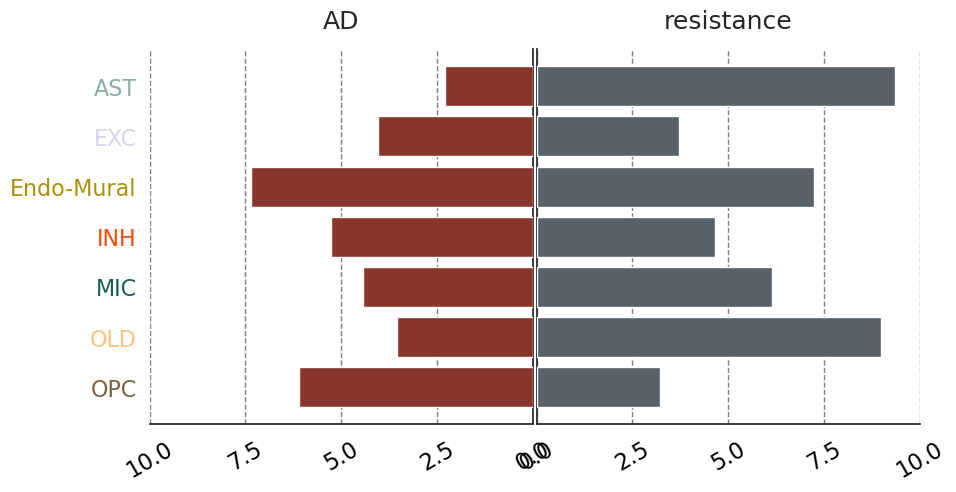

In [144]:
FC =0.25
pval=0.05
pp = "padj"
de = df_tot[(df_tot[pp]<=pval) &(np.abs(df_tot[lf])>FC)&(df_tot.Test=="resistance")]
# count = de.groupby(["celltypes"]).size().reset_index() #count()["log2FoldChange"].reset_index()

# print(df)
# df["group"] = [it[0] for it in df.index.tolist()]
# df = df.set_index("group")
# df = df
# df
# count
cond1 = "AD"
cond2="resistance"
to_plot = pd.DataFrame(index=de.celltypes.unique().tolist())

up = de[de[lf]>FC]
up = pd.DataFrame(up.groupby("celltypes").size(),#/len(up),
                      columns=["up"])
to_plot = to_plot.join(up).fillna(0)
down = de[de[lf]<-FC]
down = pd.DataFrame(down.groupby("celltypes").size(),#/len(up),
                      columns=["down"])
to_plot = to_plot.join(down).fillna(0)

# to_plot = to_plot.sort_values("up", ascending=False)

# to_plot = df_toplot.set_index("celltype")
to_plot = np.log(to_plot.astype(float))
palette= {"up": "#4dac26", "down":"#d01c8b"}
palette= {"down": "#F6E8C3", "up":"#003C30"}
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()
    
ct = to_plot.index.tolist()
    
left1 = len(to_plot) * [0]
left2 = len(to_plot) * [0]
index = to_plot.index#.map('|'.join)
    # for idx, name in enumerate(brain_regions):
axes[0].barh(index, to_plot["down"], left = left1, color=palette_exp[cond1],
                 zorder=10, align="center", alpha=1)#, fill=False)
axes[1].barh(index, to_plot["up"], left = left2, color=palette_exp[cond2],
             zorder=10, align="center", alpha=1)#, fill=False)
        # left1 = left1 + down[name]
        # left2 = left2 + up[name]
    
axes[0].set_title(cond1, fontsize=18, pad=15)
axes[1].set_title(cond2, fontsize=18, pad=15)
    
                
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 
    
    # To show data from highest to lowest
plt.gca().invert_yaxis()
        
axes[0].set(yticks=ct, yticklabels=ct)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color
if True:
    axes[1].spines['right'].set_visible(False)
    axes[0].spines['left'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    
    
    font_color = 'black'
    tmp = []
    for label in (axes[0].get_xticklabels()):
        label.set(fontsize=16, color=font_color, rotation=30)
    for label in (axes[1].get_xticklabels()):
        label.set(fontsize=16, color=font_color, rotation=30)
    for label in (axes[0].get_yticklabels()):
        print(label)
        txt = label.get_text()#.split("|")[1]
    
        cond = label.get_text()#.split("|")[0]
        tmp.append(cond)
        label.set(color=PALETTE[cond], label=str(txt), fontsize=16 )
    
    # labels = [item.get_text() for item in axes[0].get_yticklabels()]
    
    axes[1].yaxis.set_ticks_position('none') 
    # adjust limits and draw grid lines
    # plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    axes[0].set_axisbelow(True)
    axes[0].xaxis.grid(color='gray', linestyle='dashed')
    axes[1].set_axisbelow(True)
    axes[1].xaxis.grid(color='gray', linestyle='dashed')
    
    max_x = max(max(axes[0].get_xticks()),max(axes[1].get_xticks()))
    axes[0].set_xlim(max_x,0)
    axes[1].set_xlim(0,max_x)
    plt.subplots_adjust(wspace=0.01, top=0.85, bottom=0.1, left=0.18, right=0.95)
    # plt.suptitle("Porportion of cell type-specific DAR", fontsize=18)
    # leg1 = plt.legend(brain_regions, bbox_to_anchor=([0.99, 1, 0, 0]), ncol=4, frameon=False)
    # ll = []
    # for it in list(set(tmp)):
    #     blue_line = lines.Line2D([], [], color=color_cond[it], 
    #                                         marker="o",
    #                                         linestyle='None',
    #                                         markersize=8, label=it)
    #     ll.append(blue_line)
    # leg2 = plt.legend(handles=ll, bbox_to_anchor=(1.5, 0.25))
    
    # axes[1].add_artist(leg1)
    
    plt.savefig("./figures/DE_OCR_ALL_resistant_.svg", bbox_inches="tight")
    plt.show()

In [130]:
def get_go(gene_list, background,ct,cutoff=0.05,
        dtbs = ['GO_Biological_Process_2023','GO_Molecular_Function_2023', 'GO_Cellular_Component_2023'],#"BioPlanet_2019"]
         #  dtbs = [ 'TRANSFAC_and_JASPAR_PWMs', 'TRRUST_Transcription_Factors_2019','BioPlanet_2019',]#'MSigDB_Hallmark_2020', 'Pfam_Domains_2019',
# dtbs = ['MSigDB_Hallmark_2020','KEGG_2021_Human','Reactome_2022', 'WikiPathway_2023_Human']#, 'BioCarta_2016']
          #dtbs=["GWAS_Catalog_2019"]
          ):
    terms = []
    for it in dtbs :
    # if True:
        enr_res = gseapy.enrichr(gene_list=gene_list,
                     organism='Human',
                    background=background,
                     gene_sets=it,
                     cutoff = cutoff)
        gg = enr_res.res2d
        gg["database"] = it
        gg["Number of genes"] = gg["Genes"].apply(lambda x: len(x.split(";")))
        gg = gg[gg["Number of genes"]>1]
        terms.append(gg)
        if len(gg[gg["Adjusted P-value"]<=cutoff])>0:
            # print(gg[gg["Adjusted P-value"]<=cutoff])
            colors =["#88352b","#ebceb1","#eee9de","#929489","#576169"]
            cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
            ax =gp.barplot(gg, figsize=(3,6.5), title=ct+ ": GO enrichment",
                    cutoff = cutoff, cmap = cmap)
            print(ax.get_yticklabels())
            ytick = [it.get_text().split("(GO")[0] for it in ax.get_yticklabels()]
            ax.set_yticklabels(ytick)     
            # plt.savefig("figures/ad_resistance_%s.svg"%ct)
            plt.show()
    
    return pd.concat(terms)

10
500
[Text(0, 0, 'RNA Binding (GO:0003723)'), Text(0, 1, 'mRNA Binding (GO:0003729)')]


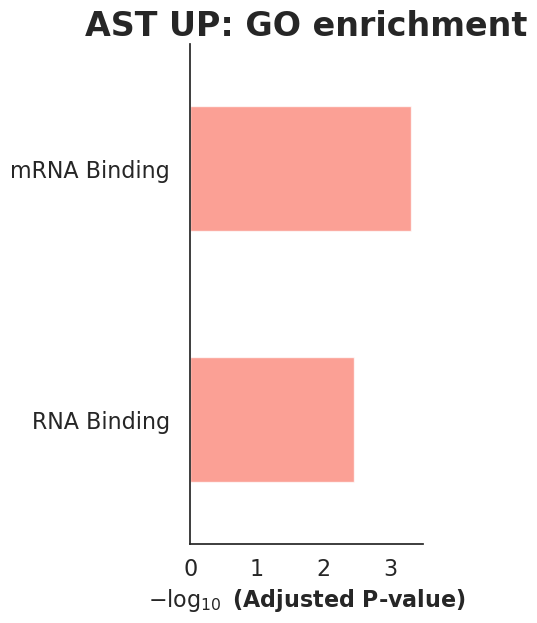

[Text(0, 0, 'Focal Adhesion (GO:0005925)'), Text(0, 1, 'Cell-Substrate Junction (GO:0030055)'), Text(0, 2, 'Intracellular Membrane-Bounded Organelle (GO:0043231)'), Text(0, 3, 'Nucleus (GO:0005634)')]


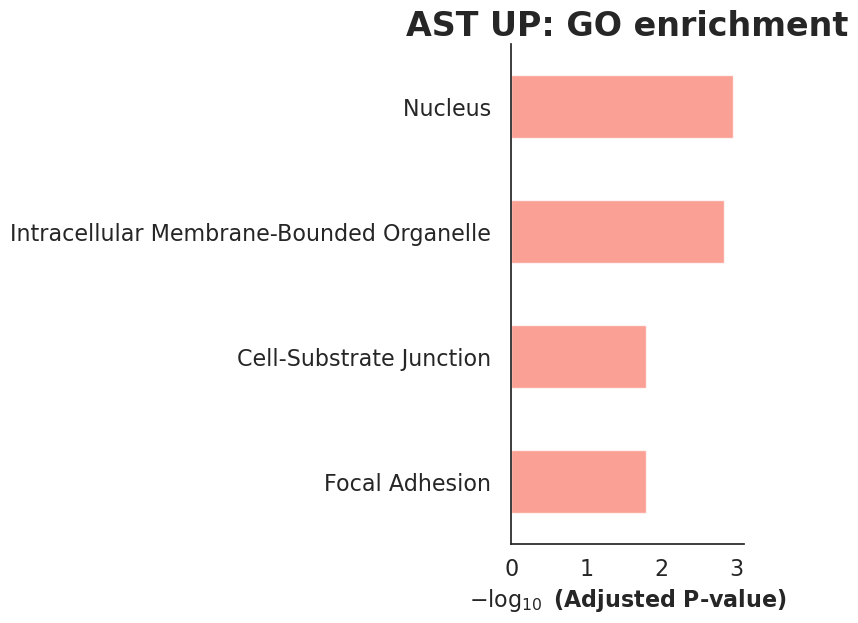

[Text(0, 0, 'Cellular Response To Cytokine Stimulus (GO:0071345)'), Text(0, 1, 'RNA Metabolic Process (GO:0016070)'), Text(0, 2, 'Protein Homooligomerization (GO:0051260)')]


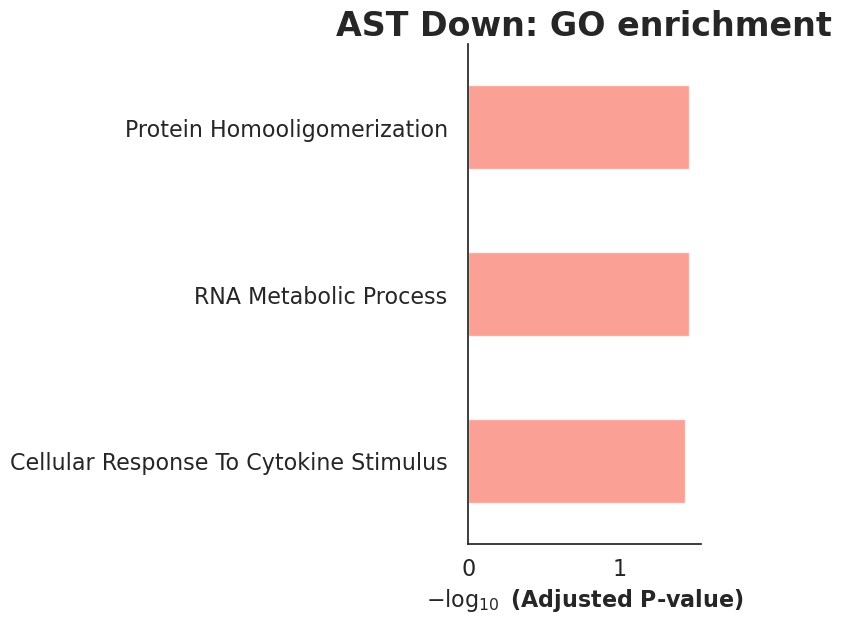

57
41
[Text(0, 0, 'Recycling Endosome (GO:0055037)')]


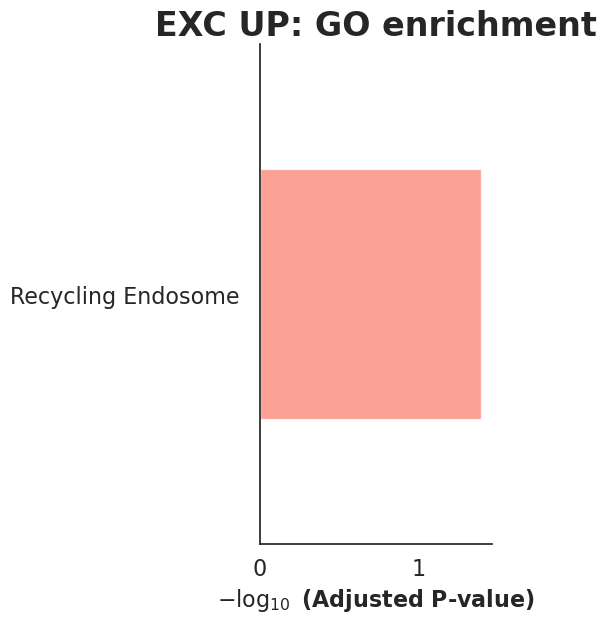

500
500
[Text(0, 0, 'Neuron Projection Morphogenesis (GO:0048812)'), Text(0, 1, 'Ribonucleoprotein Complex Biogenesis (GO:0022613)'), Text(0, 2, 'Protein Stabilization (GO:0050821)'), Text(0, 3, 'Regulation Of Apoptotic Process (GO:0042981)'), Text(0, 4, 'Anterograde Axonal Transport (GO:0008089)'), Text(0, 5, 'Gene Expression (GO:0010467)'), Text(0, 6, 'Translation (GO:0006412)'), Text(0, 7, 'Macromolecule Biosynthetic Process (GO:0009059)'), Text(0, 8, 'Peptide Biosynthetic Process (GO:0043043)'), Text(0, 9, 'Cytoplasmic Translation (GO:0002181)')]


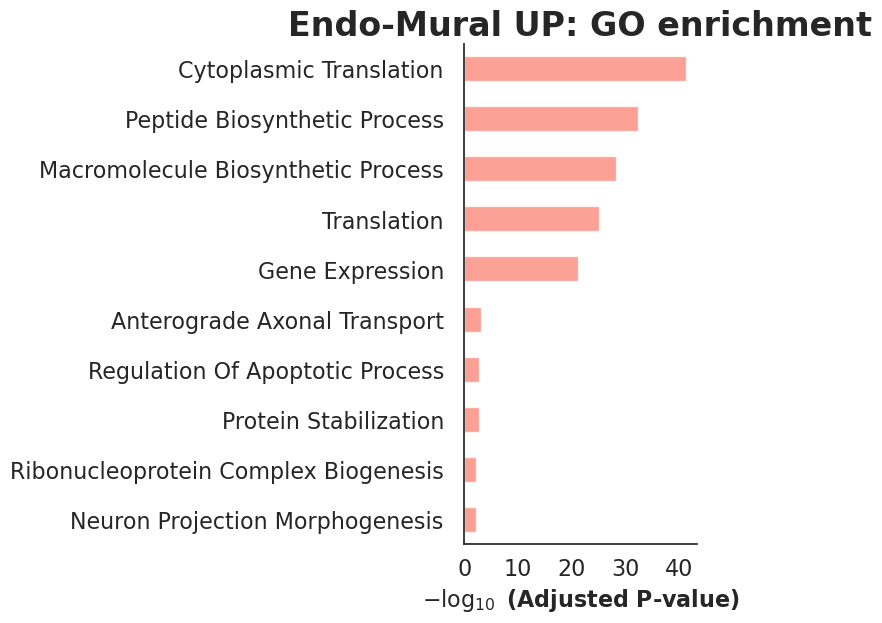

[Text(0, 0, 'Ubiquitin Protein Ligase Binding (GO:0031625)'), Text(0, 1, 'Supercoiled DNA Binding (GO:0097100)'), Text(0, 2, 'Cadherin Binding (GO:0045296)'), Text(0, 3, 'Microtubule Binding (GO:0008017)'), Text(0, 4, 'Ubiquitin-Protein Transferase Inhibitor Activity (GO:0055105)'), Text(0, 5, 'Ubiquitin Ligase Inhibitor Activity (GO:1990948)'), Text(0, 6, 'Tubulin Binding (GO:0015631)'), Text(0, 7, 'RNA Binding (GO:0003723)')]


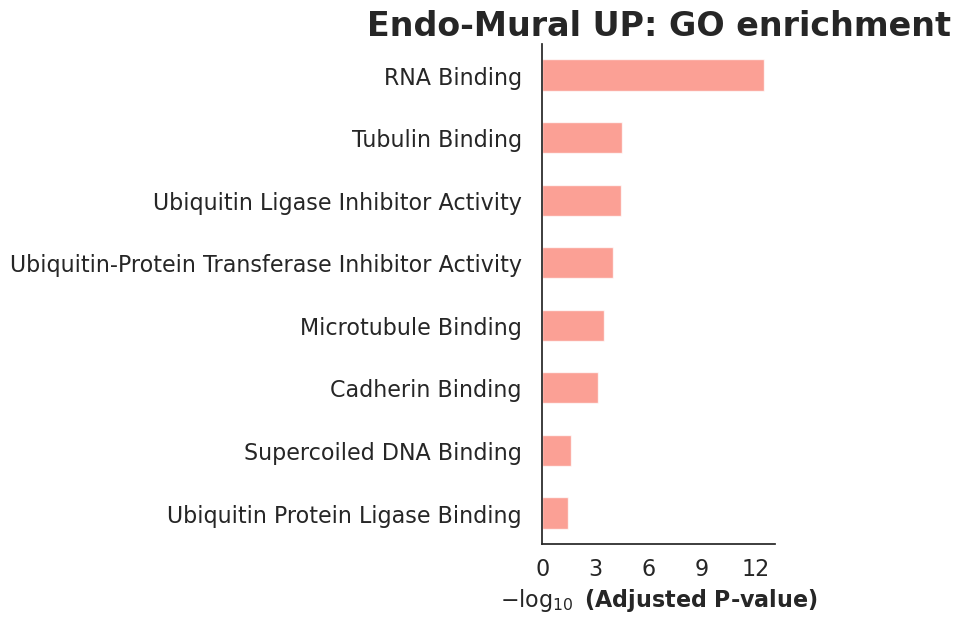

[Text(0, 0, 'Postsynaptic Density (GO:0014069)'), Text(0, 1, 'Asymmetric Synapse (GO:0032279)'), Text(0, 2, 'Cell-Substrate Junction (GO:0030055)'), Text(0, 3, 'Focal Adhesion (GO:0005925)'), Text(0, 4, 'Polysomal Ribosome (GO:0042788)'), Text(0, 5, 'Ribosome (GO:0005840)'), Text(0, 6, 'Small Ribosomal Subunit (GO:0015935)'), Text(0, 7, 'Cytosolic Small Ribosomal Subunit (GO:0022627)'), Text(0, 8, 'Large Ribosomal Subunit (GO:0015934)'), Text(0, 9, 'Cytosolic Large Ribosomal Subunit (GO:0022625)')]


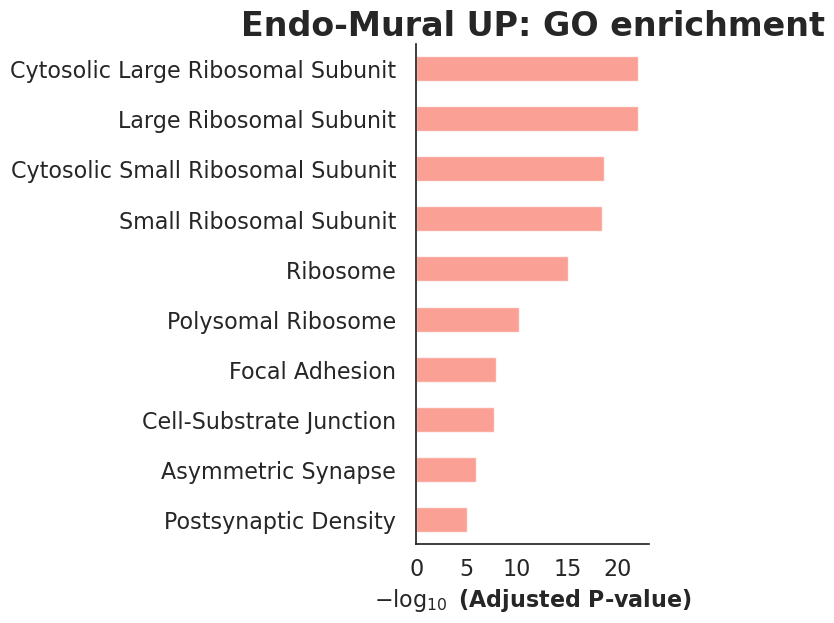

195
105
[Text(0, 0, 'MIB Complex (GO:0140275)'), Text(0, 1, 'SAM Complex (GO:0001401)'), Text(0, 2, 'Mitochondrial Membrane (GO:0031966)'), Text(0, 3, 'Mitochondrial Inner Membrane (GO:0005743)'), Text(0, 4, 'Organelle Inner Membrane (GO:0019866)'), Text(0, 5, 'MICOS Complex (GO:0061617)')]


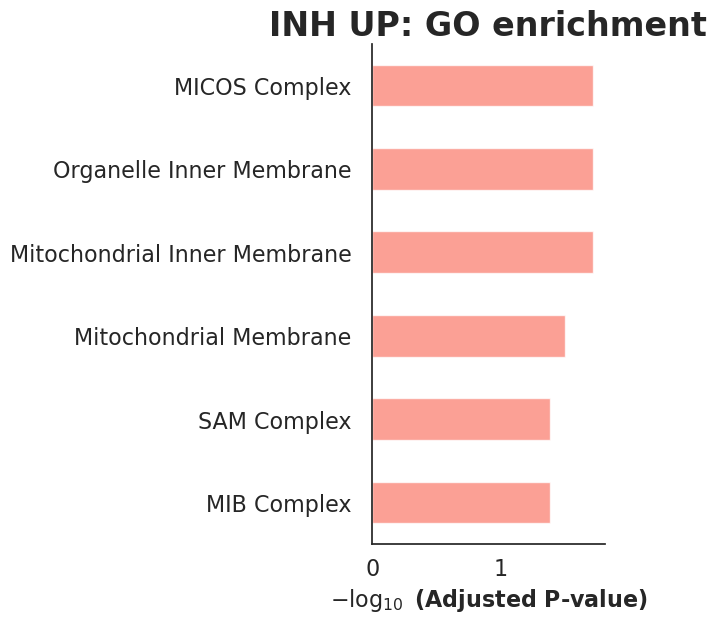

[Text(0, 0, 'Histone H2A Acetylation (GO:0043968)'), Text(0, 1, 'Histone Modification (GO:0016570)'), Text(0, 2, 'Positive Regulation Of Transcription By RNA Polymerase II (GO:0045944)'), Text(0, 3, 'Regulation Of Chromatin Organization (GO:1902275)'), Text(0, 4, 'Histone H4 Acetylation (GO:0043967)')]


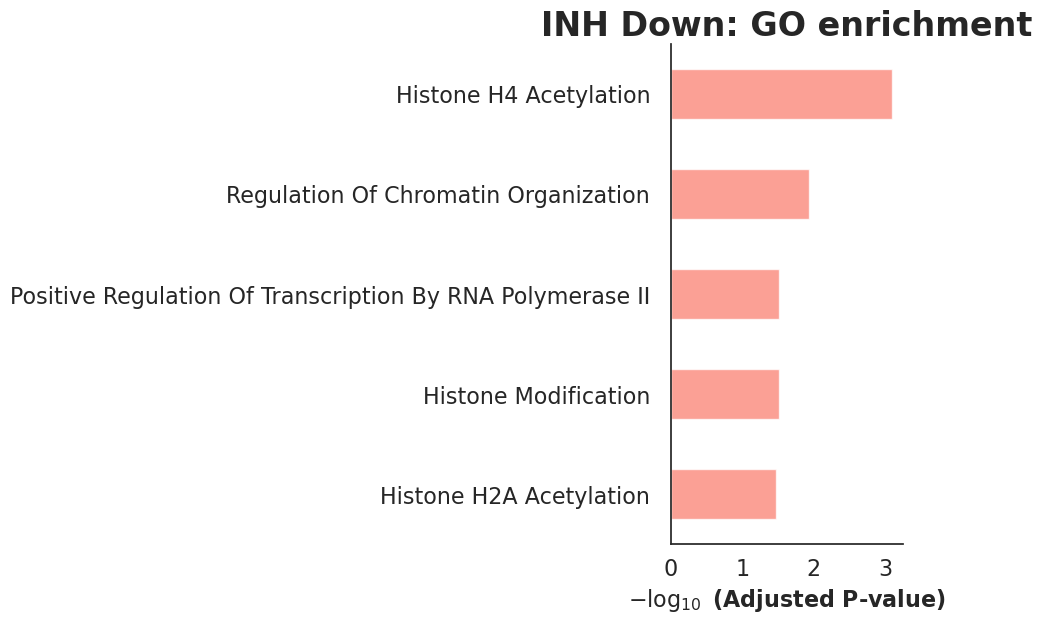

[Text(0, 0, 'Intracellular Membrane-Bounded Organelle (GO:0043231)'), Text(0, 1, 'H4 Histone Acetyltransferase Complex (GO:1902562)'), Text(0, 2, 'H4/H2A Histone Acetyltransferase Complex (GO:0043189)'), Text(0, 3, 'NuA4 Histone Acetyltransferase Complex (GO:0035267)'), Text(0, 4, 'Nucleus (GO:0005634)'), Text(0, 5, 'Histone Acetyltransferase Complex (GO:0000123)')]


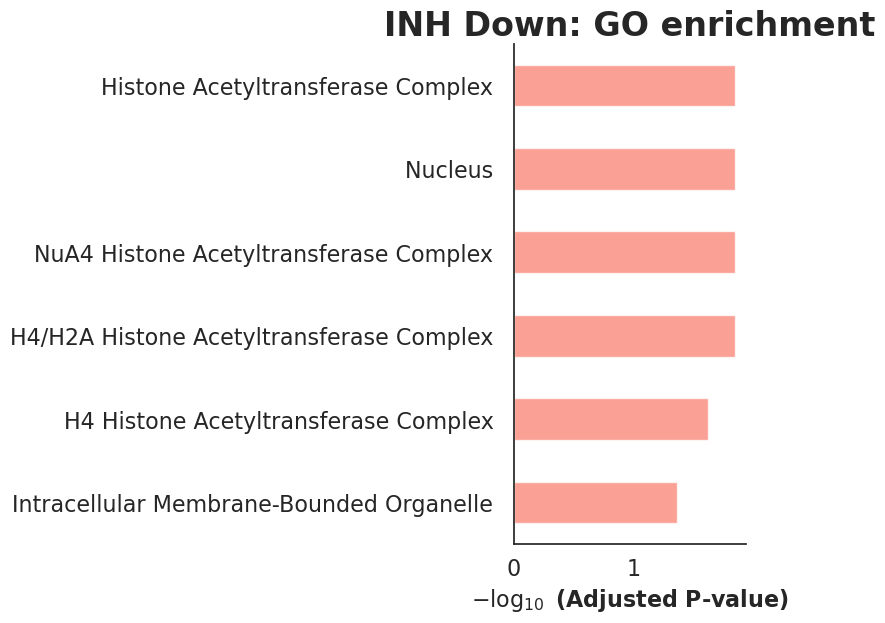

84
463
[Text(0, 0, 'Regulation Of Mitochondrial Translation (GO:0070129)'), Text(0, 1, 'rRNA Catabolic Process (GO:0016075)')]


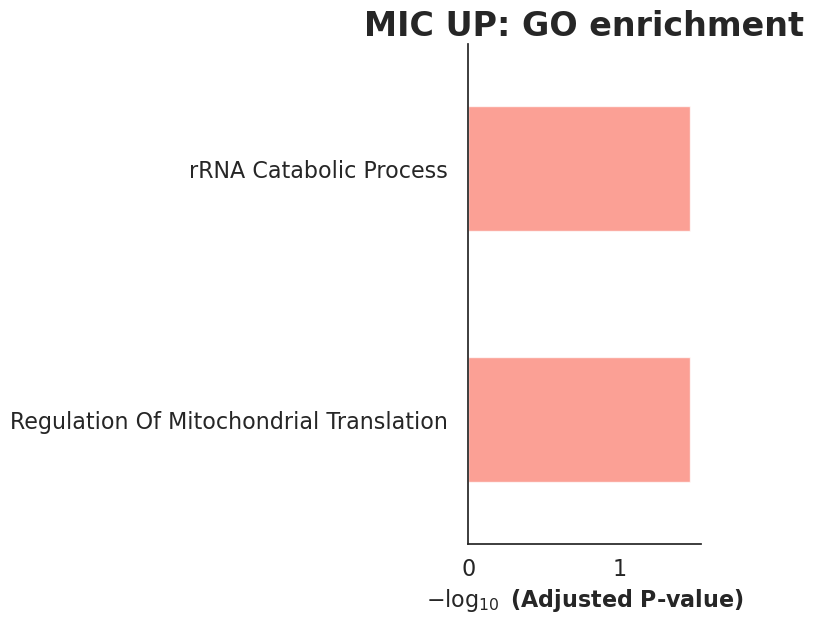

[Text(0, 0, 'Mitochondrial Membrane (GO:0031966)'), Text(0, 1, 'Smc5-Smc6 Complex (GO:0030915)'), Text(0, 2, 'Nucleolar Exosome (RNase Complex) (GO:0101019)')]


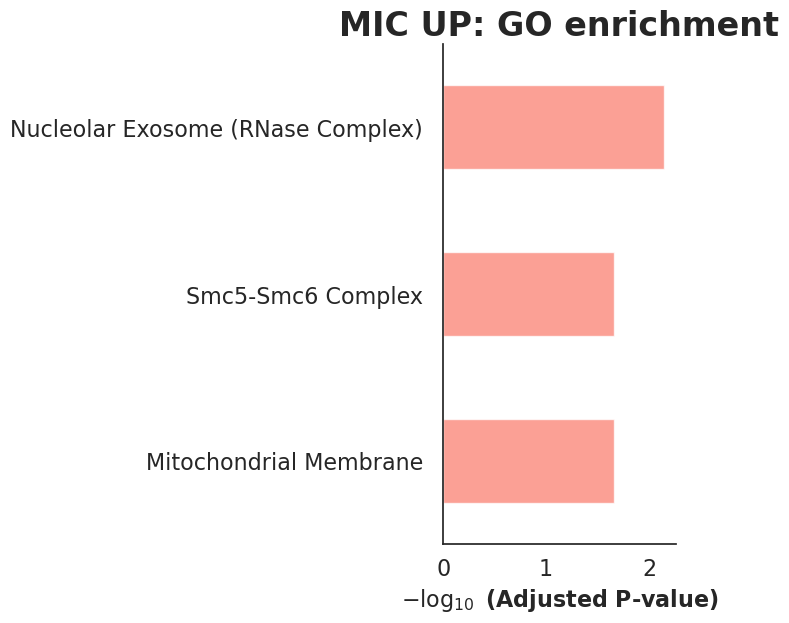

[Text(0, 0, 'Inositol Lipid-Mediated Signaling (GO:0048017)'), Text(0, 1, 'Positive Regulation Of Cell Migration (GO:0030335)'), Text(0, 2, 'Transmembrane Receptor Protein Tyrosine Kinase Signaling Pathway (GO:0007169)'), Text(0, 3, 'Insulin Receptor Signaling Pathway (GO:0008286)')]


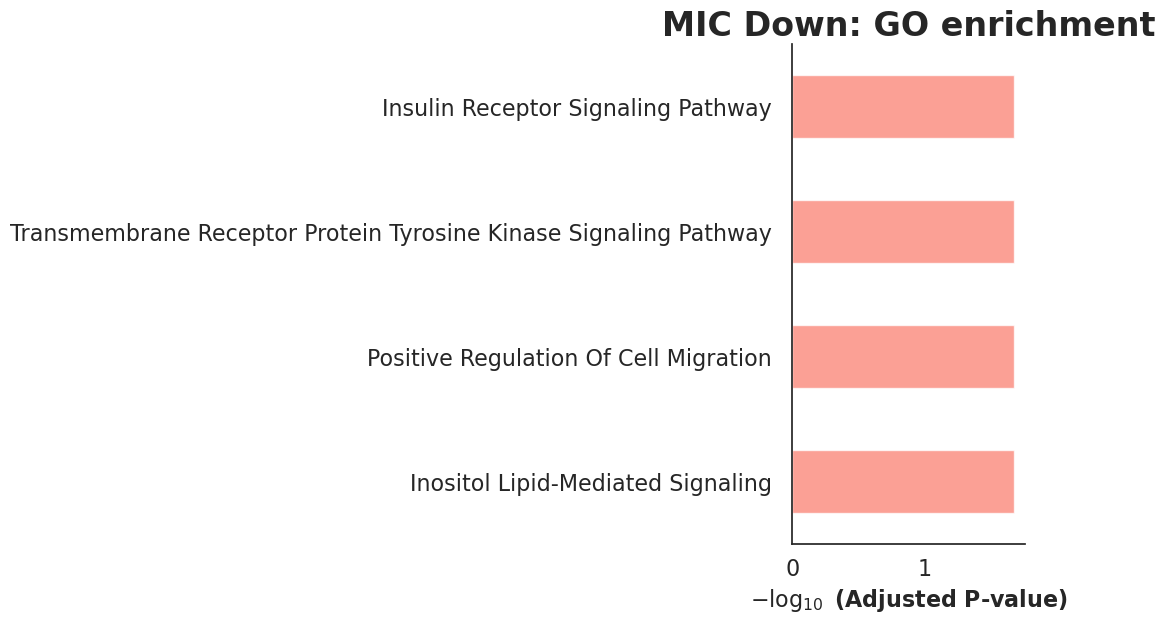

35
500
450
25
[Text(0, 0, 'Tau Protein Binding (GO:0048156)')]


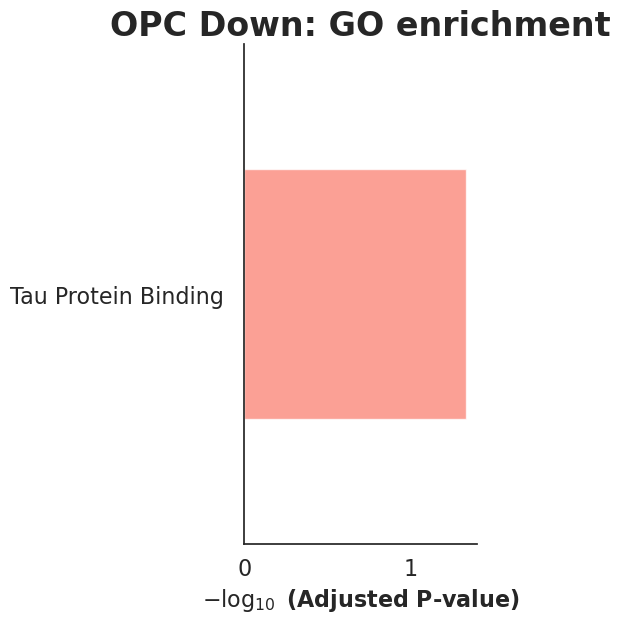

In [140]:
import gseapy as gp
import matplotlib.colors as mcolors
colors =["#88352b","#ebceb1","#eee9de","#929489","#576169"]
cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
ct="OPC"
FC=0.25
# pvl = 0.05
cutoff =0.05
nb_genes = 500
# pp = "padj" #"padj"
type_="go"
all_up = []
all_down=[]
for ct in celltypes:
    tmp = df_tot[(df_tot[pp]<=pval)&(df_tot["celltypes"] ==ct) 
                    &(df_tot.Test=="resistance")
                & (df_tot[lf]>=FC)].sort_values(lf, ascending=False).gene.tolist()[:nb_genes]
    background = df_tissue[df_tissue["celltypes"] ==ct][genes]
    background = background.loc[:, background.sum(0)>0].columns.tolist()
    # bacground=genes
    tmp_d = df_tot[(df_tot[pp]<=pval)&(df_tot["celltypes"] ==ct) 
                    &(df_tot.Test=="resistance")
                    & (df_tot[lf]<=-FC)].sort_values(lf).gene.tolist()[:nb_genes]
    print(len(tmp_d))
    
    # try:
    # print(ct)
    # tmp = dico_genes_up[ct].gene.tolist()#[:nb_genes]
    print(len(tmp))
    # tmp_d = dico_genes_down[ct].gene.tolist()#[:nb_genes]
    # print(len(tmp_d))
    if type_=="go":
     
        go_up = get_go(tmp, background, ct+ " UP", cutoff=cutoff)
        go_up = go_up[go_up["Adjusted P-value"]<=cutoff].sort_values("Adjusted P-value",ascending=True)
        go_up['Direction'] = ct
    

        go_down = get_go(tmp_d, background, ct+ " Down", cutoff=cutoff)
        go_down = go_down[go_down["Adjusted P-value"]<=cutoff].sort_values("Adjusted P-value",ascending=True)
        go_down['Direction'] = ct
    else:
       
        go_up = get_go(tmp, background, ct+ " Up", cutoff=cutoff,
                       dtbs = ['MSigDB_Hallmark_2020',
                                                       'KEGG_2021_Human','Reactome_2022', 
                                                       'WikiPathway_2023_Human'])
        go_up = go_up[go_up["Adjusted P-value"]<=cutoff].sort_values("Adjusted P-value",ascending=True)
        go_up['Direction'] = ct 
    
        go_down = get_go(tmp_d, background, ct+ " Down", cutoff=cutoff,
                           dtbs = ['MSigDB_Hallmark_2020',
                                                       'KEGG_2021_Human','Reactome_2022', 
                                                       'WikiPathway_2023_Human'])
        go_down = go_down[go_down["Adjusted P-value"]<=cutoff].sort_values("Adjusted P-value",ascending=True)
        go_down['Direction'] = ct 
    all_up.append(go_up.head(5))
    all_down.append(go_down.head(5))


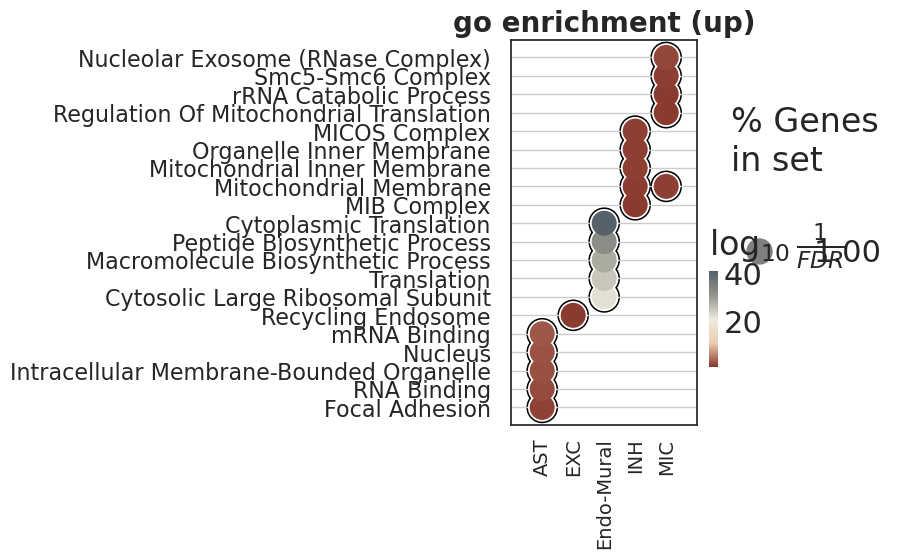

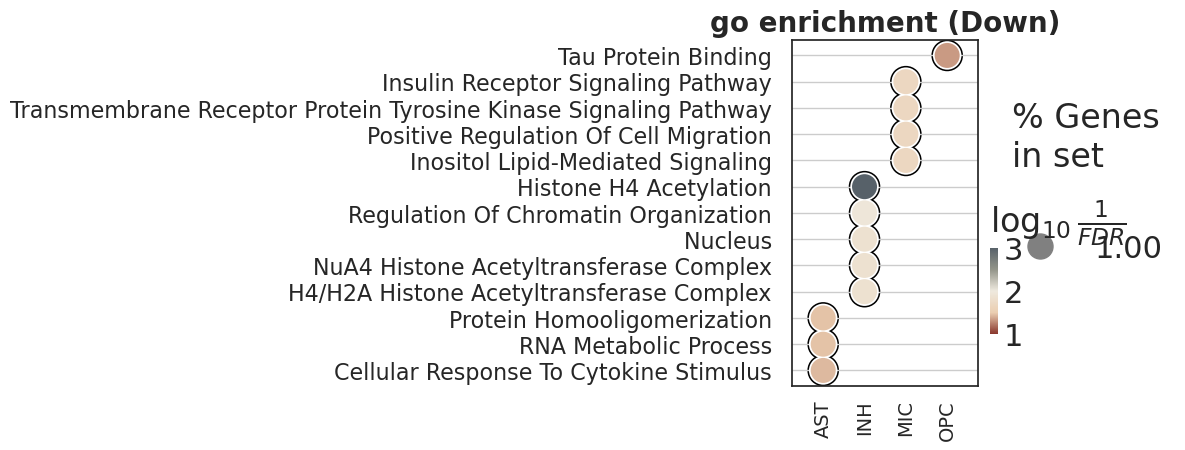

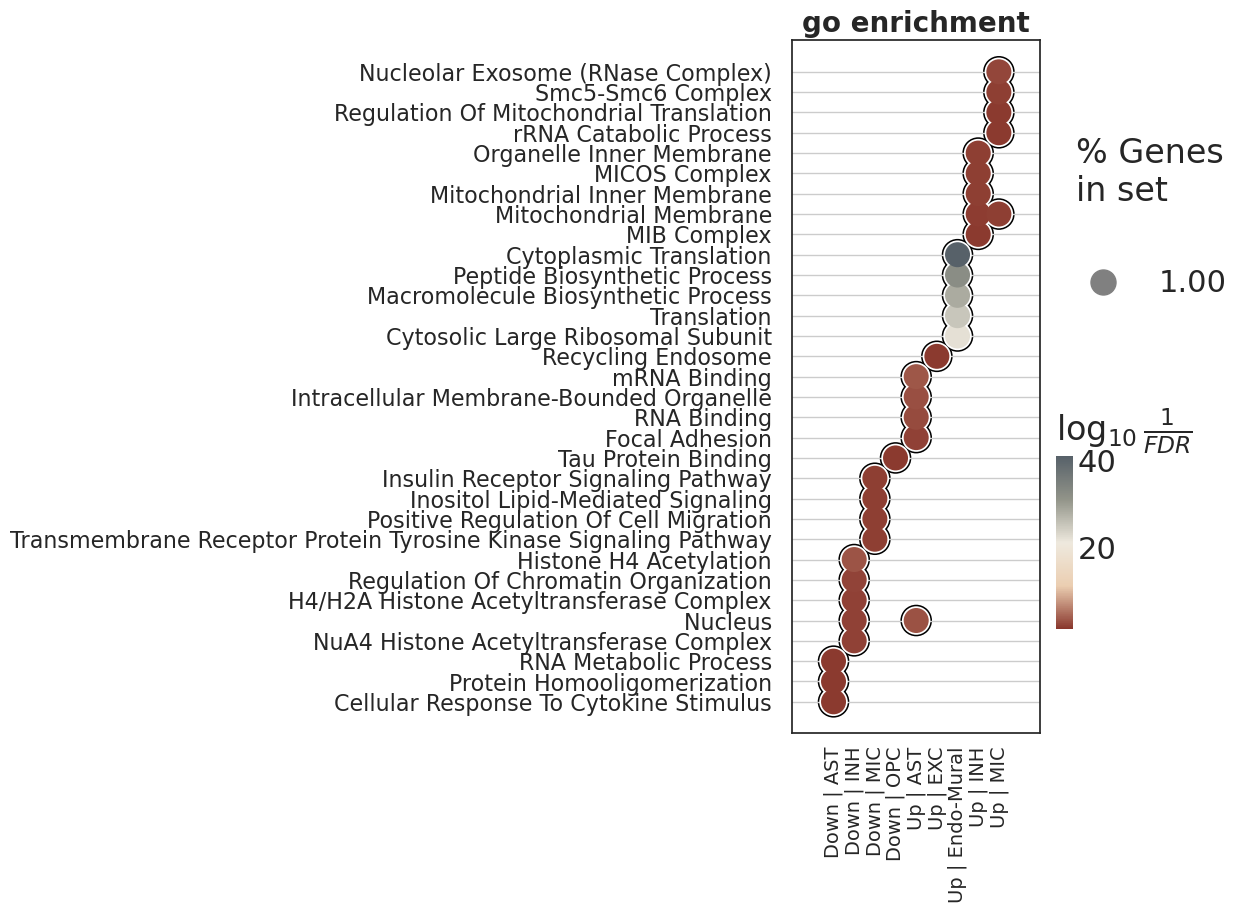

In [141]:
replacement = {}#"Histone Acetyltransferase Complex":"HAC", 
               # "Region Sequence-Specific DNA Binding":"RSS DNA Binding"}
import re
enr_res_up = pd.concat(all_up)
# print(enr_res_up)
name = type_#"booostrap_" + type_
enr_res_up["Number of genes"] = enr_res_up["Genes"].apply(lambda x: len(x.split(";")))
enr_res_up = enr_res_up[enr_res_up["Number of genes"] >1]
if len(enr_res_up[enr_res_up["Adjusted P-value"]<=cutoff])>0:
    c_order = [it for it in celltypes if it in enr_res_up.Direction.unique()]
    ax = gp.dotplot(enr_res_up,figsize=(3,5),
                    x='Direction',
                    x_order = c_order,
                    title=name + " enrichment (up)",
                    cmap = cmap,
                    size=3,
                    cutoff=cutoff,
                    show_ring=True)
    ytick = [it.get_text().split("(GO")[0].split("R-HSA")[0] for it in ax.get_yticklabels()]
    ax.set_yticklabels(ytick)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel("")
    plt.savefig("figures/%s_UP_resistance_ad_all.svg"%(name))
    plt.show()

enr_res_down = pd.concat(all_down)
enr_res_down["Number of genes"] = enr_res_down["Genes"].apply(lambda x: len(x.split(";")))
enr_res_down = enr_res_down[enr_res_down["Number of genes"] >1]
if len(enr_res_down[enr_res_down["Adjusted P-value"]<=cutoff])>0:
    c_order = [it for it in celltypes if it in enr_res_down.Direction.unique()]

    ax = gp.dotplot(enr_res_down,figsize=(3,4.5),
                    x='Direction',
                    x_order = c_order,
                    title=name + " enrichment (Down)",
                    cmap = cmap,
                    size=3,
                    cutoff=cutoff,
                    show_ring=True)
    ytick = [it.get_text().split("(GO")[0].split("R-HSA")[0] for it in ax.get_yticklabels()]
    ytick = [re.split("WP[0-9]",it)[0]for it in ytick]
    for k,v in replacement.items():
        ytick = [ it.replace(k,v) for it in ytick]
    ax.set_yticklabels(ytick)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel("")
    plt.savefig("figures/%s_DOWN_resistance_ad_all.svg"%(name))
    plt.show()
enr_res_down["Direction"] = "Down | " + enr_res_down["Direction"] 
enr_res_up["Direction"] = "Up | " + enr_res_up["Direction"] 
enr_ = pd.concat([enr_res_up,enr_res_down])
if len(enr_[enr_["Adjusted P-value"]<=cutoff])>0:
    # c_order = [it for it in celltypes if it in enr_.Direction.unique()]

    ax = gp.dotplot(enr_,figsize=(4,9),
                    x='Direction',
                    # x_order = c_order,
                    title=name + " enrichment",
                    cmap = cmap,
                    size=3,
                    cutoff=cutoff,
                    show_ring=True)
    ytick = [it.get_text().split("(GO")[0].split("R-HSA")[0] for it in ax.get_yticklabels()]
    ytick = [re.split("WP[0-9]",it)[0]for it in ytick]
    for k,v in replacement.items():
        ytick = [ it.replace(k,v) for it in ytick]
    ax.set_yticklabels(ytick)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel("")
    plt.savefig("figures/%s_BOTH_resistance_ad_all.svg"%(name))
    plt.show()

In [136]:
enr_res_up

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes,database,Number of genes,Direction
0,GO_Molecular_Function_2023,RNA Binding (GO:0003723),1.477254e-11,1.685547e-08,0,0,1.719869,42.890522,POP5;POP7;SLC4A1AP;TFRC;POP1;POP4;C4BPA;NOC2L;...,GO_Molecular_Function_2023,1064,Up | AST
1,GO_Cellular_Component_2023,Nucleus (GO:0005634),2.825799e-10,6.569982e-08,0,0,1.355912,29.812523,ATF1;ATF2;JRK;POP7;SPI1;PWWP2B;TESK1;NOC2L;ALK...,GO_Cellular_Component_2023,2992,Up | AST
0,GO_Cellular_Component_2023,Intracellular Membrane-Bounded Organelle (GO:0...,1.949836e-10,6.569982e-08,0,0,1.338353,29.923028,ITSN2;JRK;TFRC;PWWP2B;ITSN1;SLA2;ALKBH3;FAM110...,GO_Cellular_Component_2023,3451,Up | AST
2,GO_Cellular_Component_2023,Asymmetric Synapse (GO:0032279),7.771744e-08,1.204620e-05,0,0,6.322917,103.507323,RPL30;CTNND2;FMR1;RPL8;ZDHHC2;SLC8A1;RPL7;SLC8...,GO_Cellular_Component_2023,120,Up | AST
3,GO_Cellular_Component_2023,Postsynaptic Density (GO:0014069),1.684748e-06,1.958520e-04,0,0,3.892539,51.747001,RPL30;CTNND2;FMR1;RPL8;ZDHHC2;SLC8A1;RPL7;SLC8...,GO_Cellular_Component_2023,133,Up | AST
0,GO_Cellular_Component_2023,Recycling Endosome (GO:0055037),6.248309e-04,3.998918e-02,0,0,11.454690,84.513041,VPS52;TBC1D14;DENND6A;ATP9A,GO_Cellular_Component_2023,4,Up | EXC
0,GO_Biological_Process_2023,Cytoplasmic Translation (GO:0002181),6.173106e-45,2.267999e-41,0,0,26.692992,2717.243159,EIF4A2;RPL5;RPL30;RPL32;RPL31;RPL34;RPLP1;RPLP...,GO_Biological_Process_2023,62,Up | Endo-Mural
1,GO_Biological_Process_2023,Peptide Biosynthetic Process (GO:0043043),8.317724e-32,1.527966e-28,0,0,9.331180,667.779721,RPL5;HBS1L;PCSK1;RPL30;RPL32;RPL31;RPL34;RPLP1...,GO_Biological_Process_2023,66,Up | Endo-Mural
0,GO_Molecular_Function_2023,RNA Binding (GO:0003723),3.705699e-29,2.605107e-26,0,0,2.560935,167.651854,EIF4A2;RPL5;RPL30;RPL32;RPL31;RPL34;HNRNPU;HNR...,GO_Molecular_Function_2023,240,Up | Endo-Mural
1,GO_Cellular_Component_2023,Large Ribosomal Subunit (GO:0015934),7.478360e-28,1.368540e-25,0,0,31.819247,1987.441890,RPL5;RPL30;RPL32;RPL31;RPL34;RPLP1;RPL12;RPLP0...,GO_Cellular_Component_2023,36,Up | Endo-Mural
